In [253]:
import pandas as pd

In [254]:
bike = pd.read_csv("daily-bike-share.csv")

In [255]:
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


In [256]:
bike = bike.drop(columns = "dteday")

In [257]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  rentals     731 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.4 KB


In [258]:
bike.isna().sum()

instant       0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
rentals       0
dtype: int64

In [259]:
x, y = bike[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike["rentals"].values

In [260]:
x #features or input

array([[ 1.      ,  1.      ,  0.      , ...,  0.363625,  0.805833,
         0.160446],
       [ 1.      ,  1.      ,  0.      , ...,  0.353739,  0.696087,
         0.248539],
       [ 1.      ,  1.      ,  0.      , ...,  0.189405,  0.437273,
         0.248309],
       ...,
       [ 1.      , 12.      ,  0.      , ...,  0.2424  ,  0.752917,
         0.124383],
       [ 1.      , 12.      ,  0.      , ...,  0.2317  ,  0.483333,
         0.350754],
       [ 1.      , 12.      ,  0.      , ...,  0.223487,  0.5775  ,
         0.154846]])

In [261]:
y # label or target

array([ 331,  131,  120,  108,   82,   88,  148,   68,   54,   41,   43,
         25,   38,   54,  222,  251,  117,    9,   78,   83,   75,   93,
        150,   86,  186,   34,   15,   38,  123,  140,   42,   47,   72,
         61,   88,  100,  354,  120,   64,   53,   47,  149,  288,  397,
        208,  140,  218,  259,  579,  532,  639,  195,   74,  139,  100,
        120,  424,  694,   81,  137,  231,  123,  214,  640,  114,  244,
        316,  191,   46,  247,  724,  982,  359,  289,  321,  424,  884,
       1424, 1047,  401,  460,  203,  166,  300,  981,  472,  222,  317,
        168,  179,  307,  898, 1651,  734,  167,  413,  571,  172,  879,
       1188,  855,  257,  209,  529,  642,  121, 1558,  669,  409,  613,
        745,  177, 1462, 1710,  773,  678,  547,  569,  878, 1965, 1138,
        847,  603,  255,  614,  894, 1612, 1401,  664,  694,  550,  695,
        692,  902, 1582,  773,  678,  536,  735,  909, 2258, 1576,  836,
        659,  740,  758,  871, 2001, 2355, 1549,  6

In [262]:
from sklearn.model_selection import train_test_split

In [263]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [264]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((511, 10), (220, 10), (511,), (220,))

In [265]:
# create a dictionary and a function to fit and score all possible regressor models you want to use at once

In [266]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [267]:
Models = {
    "linearmodel" : LinearRegression(),
    "ridge" : Ridge(0.5),
    "lasso" : Lasso(0.001),
    "randomforest" : RandomForestRegressor(),
    "gradient" : GradientBoostingRegressor(),
    "tree" : DecisionTreeRegressor(),
    "svr" : SVR(),
    "neighbor" : KNeighborsRegressor(),
    "catboost" : CatBoostRegressor(),
    "xgboost" : XGBRegressor()
}

In [268]:
def fit_and_score(models, xtrain, xtest, ytrain, ytest):
    
    np.random.seed(42)
    
    model_score = {}
    
    for name, model in Models.items():
        model.fit(xtrain, ytrain)
        
        model_score[name] = model.score(xtest, ytest)
        
    return model_score
        

In [269]:
scores = fit_and_score(models = Models, xtrain = x_train, xtest = x_test, ytrain = y_train, ytest = y_test)
scores

C:\Users\kolad\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17368362.267561205, tolerance: 25327.27024774952
  model = cd_fast.enet_coordinate_descent(


Learning rate set to 0.036822
0:	learn: 689.0530792	total: 7.12ms	remaining: 7.11s
1:	learn: 673.8610999	total: 13.5ms	remaining: 6.75s
2:	learn: 659.8025344	total: 19.9ms	remaining: 6.63s
3:	learn: 645.1852866	total: 26.4ms	remaining: 6.56s
4:	learn: 630.9249785	total: 32.9ms	remaining: 6.55s
5:	learn: 617.9450477	total: 38.5ms	remaining: 6.38s
6:	learn: 605.4989325	total: 42.1ms	remaining: 5.97s
7:	learn: 593.5725619	total: 45.9ms	remaining: 5.69s
8:	learn: 582.2611609	total: 48ms	remaining: 5.28s
9:	learn: 571.0311966	total: 51.6ms	remaining: 5.11s
10:	learn: 561.5952741	total: 55.1ms	remaining: 4.96s
11:	learn: 550.9696453	total: 60.4ms	remaining: 4.97s
12:	learn: 541.5354535	total: 66.4ms	remaining: 5.04s
13:	learn: 531.4276332	total: 71ms	remaining: 5s
14:	learn: 522.1202947	total: 76ms	remaining: 4.99s
15:	learn: 513.4136074	total: 79.7ms	remaining: 4.9s
16:	learn: 504.5477375	total: 83.4ms	remaining: 4.82s
17:	learn: 496.3922791	total: 86.8ms	remaining: 4.73s
18:	learn: 488.150

190:	learn: 239.4847432	total: 487ms	remaining: 2.06s
191:	learn: 238.7693990	total: 490ms	remaining: 2.06s
192:	learn: 238.2747974	total: 493ms	remaining: 2.06s
193:	learn: 237.6084717	total: 496ms	remaining: 2.06s
194:	learn: 237.4333765	total: 499ms	remaining: 2.06s
195:	learn: 237.2564169	total: 501ms	remaining: 2.06s
196:	learn: 236.7772607	total: 504ms	remaining: 2.06s
197:	learn: 236.2473277	total: 507ms	remaining: 2.05s
198:	learn: 235.8917849	total: 510ms	remaining: 2.05s
199:	learn: 235.7666378	total: 513ms	remaining: 2.05s
200:	learn: 235.1148614	total: 516ms	remaining: 2.05s
201:	learn: 234.4284239	total: 520ms	remaining: 2.05s
202:	learn: 234.0554335	total: 523ms	remaining: 2.05s
203:	learn: 233.8552484	total: 525ms	remaining: 2.05s
204:	learn: 233.4100240	total: 526ms	remaining: 2.04s
205:	learn: 232.7796203	total: 528ms	remaining: 2.04s
206:	learn: 232.5662969	total: 530ms	remaining: 2.03s
207:	learn: 232.0269772	total: 532ms	remaining: 2.02s
208:	learn: 231.7349483	tota

351:	learn: 186.3545575	total: 822ms	remaining: 1.51s
352:	learn: 186.1437048	total: 825ms	remaining: 1.51s
353:	learn: 185.9427586	total: 828ms	remaining: 1.51s
354:	learn: 185.7660671	total: 831ms	remaining: 1.51s
355:	learn: 185.4713403	total: 833ms	remaining: 1.51s
356:	learn: 185.2964542	total: 836ms	remaining: 1.51s
357:	learn: 185.0623617	total: 839ms	remaining: 1.5s
358:	learn: 184.5523730	total: 842ms	remaining: 1.5s
359:	learn: 184.3661819	total: 845ms	remaining: 1.5s
360:	learn: 184.0600995	total: 848ms	remaining: 1.5s
361:	learn: 183.7857818	total: 852ms	remaining: 1.5s
362:	learn: 183.5328401	total: 855ms	remaining: 1.5s
363:	learn: 183.1789743	total: 857ms	remaining: 1.5s
364:	learn: 182.6954567	total: 860ms	remaining: 1.5s
365:	learn: 182.4358410	total: 863ms	remaining: 1.5s
366:	learn: 182.0790725	total: 867ms	remaining: 1.49s
367:	learn: 181.7421754	total: 869ms	remaining: 1.49s
368:	learn: 181.3151595	total: 871ms	remaining: 1.49s
369:	learn: 181.0686736	total: 872ms	

512:	learn: 147.6338303	total: 1.16s	remaining: 1.1s
513:	learn: 147.3739252	total: 1.16s	remaining: 1.1s
514:	learn: 147.2172730	total: 1.16s	remaining: 1.1s
515:	learn: 147.1613445	total: 1.17s	remaining: 1.09s
516:	learn: 147.1060013	total: 1.17s	remaining: 1.09s
517:	learn: 146.8520125	total: 1.17s	remaining: 1.09s
518:	learn: 146.7524747	total: 1.18s	remaining: 1.09s
519:	learn: 146.5148956	total: 1.18s	remaining: 1.09s
520:	learn: 146.1989313	total: 1.18s	remaining: 1.09s
521:	learn: 145.9050287	total: 1.19s	remaining: 1.08s
522:	learn: 145.4971103	total: 1.19s	remaining: 1.08s
523:	learn: 145.3060273	total: 1.19s	remaining: 1.08s
524:	learn: 144.9635600	total: 1.19s	remaining: 1.08s
525:	learn: 144.9229136	total: 1.19s	remaining: 1.07s
526:	learn: 144.7888929	total: 1.2s	remaining: 1.07s
527:	learn: 144.7302335	total: 1.2s	remaining: 1.07s
528:	learn: 144.5967747	total: 1.2s	remaining: 1.07s
529:	learn: 144.3183509	total: 1.2s	remaining: 1.06s
530:	learn: 144.1418182	total: 1.2s

673:	learn: 122.9320348	total: 1.49s	remaining: 722ms
674:	learn: 122.6563874	total: 1.5s	remaining: 720ms
675:	learn: 122.4633686	total: 1.5s	remaining: 718ms
676:	learn: 122.3221653	total: 1.5s	remaining: 716ms
677:	learn: 122.1041047	total: 1.5s	remaining: 714ms
678:	learn: 122.0757452	total: 1.51s	remaining: 712ms
679:	learn: 121.9220353	total: 1.51s	remaining: 710ms
680:	learn: 121.8432707	total: 1.51s	remaining: 708ms
681:	learn: 121.7176929	total: 1.51s	remaining: 707ms
682:	learn: 121.5674092	total: 1.52s	remaining: 705ms
683:	learn: 121.3970059	total: 1.52s	remaining: 703ms
684:	learn: 121.3803836	total: 1.52s	remaining: 701ms
685:	learn: 121.2561981	total: 1.53s	remaining: 699ms
686:	learn: 121.2233110	total: 1.53s	remaining: 697ms
687:	learn: 121.1377736	total: 1.53s	remaining: 694ms
688:	learn: 120.9969568	total: 1.53s	remaining: 692ms
689:	learn: 120.8606668	total: 1.53s	remaining: 690ms
690:	learn: 120.7063176	total: 1.54s	remaining: 687ms
691:	learn: 120.5582919	total: 1

828:	learn: 105.6003675	total: 1.83s	remaining: 377ms
829:	learn: 105.4834858	total: 1.83s	remaining: 375ms
830:	learn: 105.4424980	total: 1.83s	remaining: 373ms
831:	learn: 105.2979492	total: 1.84s	remaining: 371ms
832:	learn: 105.2030304	total: 1.84s	remaining: 369ms
833:	learn: 105.0861498	total: 1.84s	remaining: 367ms
834:	learn: 105.0628102	total: 1.84s	remaining: 365ms
835:	learn: 105.0547281	total: 1.85s	remaining: 362ms
836:	learn: 104.9626425	total: 1.85s	remaining: 360ms
837:	learn: 104.8555816	total: 1.85s	remaining: 359ms
838:	learn: 104.8084256	total: 1.86s	remaining: 356ms
839:	learn: 104.7623829	total: 1.86s	remaining: 354ms
840:	learn: 104.6217548	total: 1.86s	remaining: 352ms
841:	learn: 104.5318728	total: 1.86s	remaining: 350ms
842:	learn: 104.3758449	total: 1.87s	remaining: 348ms
843:	learn: 104.1102213	total: 1.87s	remaining: 346ms
844:	learn: 104.0317134	total: 1.87s	remaining: 343ms
845:	learn: 103.9891380	total: 1.87s	remaining: 341ms
846:	learn: 103.8372258	tota

{'linearmodel': 0.6125165665206124,
 'ridge': 0.6584094873500979,
 'lasso': 0.612984845245542,
 'randomforest': 0.8081162422460008,
 'gradient': 0.787856019930679,
 'tree': 0.6070838790267943,
 'svr': 0.027503099212006665,
 'neighbor': 0.677863905110522,
 'catboost': 0.8161455163408725,
 'xgboost': 0.7830415821837888}

In [270]:
df_score = pd.DataFrame(scores, index = ["scores"])

In [271]:
df_score

,linearmodel,ridge,lasso,randomforest,gradient,tree,svr,neighbor,catboost,xgboost
scores,0.612517,0.658409,0.612985,0.808116,0.787856,0.607084,0.027503,0.677864,0.816146,0.783042


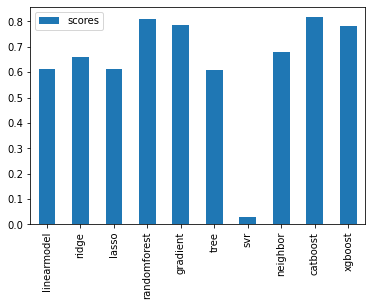

In [272]:
df_score.T.plot.bar();

In [274]:
cat = CatBoostRegressor()

In [275]:
cat.fit(x_train, y_train)

Learning rate set to 0.036822
0:	learn: 689.0530792	total: 5.6ms	remaining: 5.59s
1:	learn: 673.8610999	total: 8.99ms	remaining: 4.49s
2:	learn: 659.8025344	total: 11.5ms	remaining: 3.83s
3:	learn: 645.1852866	total: 14.8ms	remaining: 3.69s
4:	learn: 630.9249785	total: 17.8ms	remaining: 3.54s
5:	learn: 617.9450477	total: 20.7ms	remaining: 3.42s
6:	learn: 605.4989325	total: 24ms	remaining: 3.4s
7:	learn: 593.5725619	total: 26ms	remaining: 3.23s
8:	learn: 582.2611609	total: 27.4ms	remaining: 3.01s
9:	learn: 571.0311966	total: 30.2ms	remaining: 2.98s
10:	learn: 561.5952741	total: 32.1ms	remaining: 2.88s
11:	learn: 550.9696453	total: 34ms	remaining: 2.8s
12:	learn: 541.5354535	total: 35.9ms	remaining: 2.73s
13:	learn: 531.4276332	total: 37.9ms	remaining: 2.67s
14:	learn: 522.1202947	total: 39.8ms	remaining: 2.61s
15:	learn: 513.4136074	total: 41.6ms	remaining: 2.56s
16:	learn: 504.5477375	total: 44.1ms	remaining: 2.55s
17:	learn: 496.3922791	total: 47.5ms	remaining: 2.59s
18:	learn: 488.15

156:	learn: 253.3986799	total: 331ms	remaining: 1.77s
157:	learn: 252.7521652	total: 334ms	remaining: 1.78s
158:	learn: 252.3870258	total: 337ms	remaining: 1.78s
159:	learn: 251.7370395	total: 340ms	remaining: 1.78s
160:	learn: 251.4114302	total: 343ms	remaining: 1.79s
161:	learn: 250.9814016	total: 346ms	remaining: 1.79s
162:	learn: 250.5489977	total: 349ms	remaining: 1.79s
163:	learn: 250.1956537	total: 352ms	remaining: 1.79s
164:	learn: 249.7464478	total: 355ms	remaining: 1.79s
165:	learn: 249.2067641	total: 357ms	remaining: 1.8s
166:	learn: 248.7987512	total: 360ms	remaining: 1.8s
167:	learn: 248.4276364	total: 363ms	remaining: 1.8s
168:	learn: 247.9479537	total: 366ms	remaining: 1.8s
169:	learn: 247.5151932	total: 374ms	remaining: 1.82s
170:	learn: 247.2465513	total: 378ms	remaining: 1.83s
171:	learn: 246.9611615	total: 381ms	remaining: 1.83s
172:	learn: 246.5794831	total: 384ms	remaining: 1.83s
173:	learn: 246.2296772	total: 387ms	remaining: 1.84s
174:	learn: 245.4418010	total: 3

387:	learn: 176.3914690	total: 834ms	remaining: 1.31s
388:	learn: 176.2466522	total: 836ms	remaining: 1.31s
389:	learn: 176.0213186	total: 839ms	remaining: 1.31s
390:	learn: 175.8255384	total: 842ms	remaining: 1.31s
391:	learn: 175.6427017	total: 845ms	remaining: 1.31s
392:	learn: 175.3900845	total: 848ms	remaining: 1.31s
393:	learn: 175.0560558	total: 851ms	remaining: 1.31s
394:	learn: 174.7947685	total: 854ms	remaining: 1.31s
395:	learn: 174.4045259	total: 856ms	remaining: 1.31s
396:	learn: 174.1906470	total: 860ms	remaining: 1.3s
397:	learn: 173.9083445	total: 862ms	remaining: 1.3s
398:	learn: 173.8046710	total: 866ms	remaining: 1.3s
399:	learn: 173.6098373	total: 869ms	remaining: 1.3s
400:	learn: 173.4535085	total: 870ms	remaining: 1.3s
401:	learn: 173.3059361	total: 872ms	remaining: 1.3s
402:	learn: 173.1191895	total: 874ms	remaining: 1.29s
403:	learn: 172.7321263	total: 876ms	remaining: 1.29s
404:	learn: 172.4144201	total: 878ms	remaining: 1.29s
405:	learn: 172.2495016	total: 880

544:	learn: 142.1315681	total: 1.17s	remaining: 975ms
545:	learn: 141.9078720	total: 1.17s	remaining: 974ms
546:	learn: 141.4777783	total: 1.17s	remaining: 972ms
547:	learn: 141.3763893	total: 1.18s	remaining: 970ms
548:	learn: 141.3536166	total: 1.18s	remaining: 969ms
549:	learn: 141.1654565	total: 1.18s	remaining: 967ms
550:	learn: 141.0582549	total: 1.19s	remaining: 966ms
551:	learn: 140.9903811	total: 1.19s	remaining: 964ms
552:	learn: 140.7094945	total: 1.19s	remaining: 963ms
553:	learn: 140.6209552	total: 1.19s	remaining: 962ms
554:	learn: 140.3602460	total: 1.2s	remaining: 960ms
555:	learn: 140.1740805	total: 1.2s	remaining: 957ms
556:	learn: 140.0483643	total: 1.2s	remaining: 955ms
557:	learn: 139.9328053	total: 1.2s	remaining: 953ms
558:	learn: 139.6411332	total: 1.2s	remaining: 950ms
559:	learn: 139.5138433	total: 1.21s	remaining: 948ms
560:	learn: 139.4196996	total: 1.21s	remaining: 946ms
561:	learn: 139.2797762	total: 1.21s	remaining: 944ms
562:	learn: 139.2547891	total: 1.

699:	learn: 119.5383295	total: 1.5s	remaining: 644ms
700:	learn: 119.4395008	total: 1.51s	remaining: 643ms
701:	learn: 119.3166756	total: 1.51s	remaining: 641ms
702:	learn: 119.0680691	total: 1.51s	remaining: 639ms
703:	learn: 118.9005766	total: 1.51s	remaining: 637ms
704:	learn: 118.7870461	total: 1.52s	remaining: 635ms
705:	learn: 118.6721543	total: 1.52s	remaining: 633ms
706:	learn: 118.4986425	total: 1.52s	remaining: 632ms
707:	learn: 118.4199826	total: 1.53s	remaining: 630ms
708:	learn: 118.2987518	total: 1.53s	remaining: 628ms
709:	learn: 118.2609865	total: 1.53s	remaining: 626ms
710:	learn: 118.1003897	total: 1.53s	remaining: 624ms
711:	learn: 117.9331239	total: 1.54s	remaining: 621ms
712:	learn: 117.8288602	total: 1.54s	remaining: 619ms
713:	learn: 117.8112496	total: 1.54s	remaining: 617ms
714:	learn: 117.6635855	total: 1.54s	remaining: 615ms
715:	learn: 117.5496065	total: 1.54s	remaining: 613ms
716:	learn: 117.4928427	total: 1.55s	remaining: 610ms
717:	learn: 117.4214223	total

858:	learn: 102.3762344	total: 1.84s	remaining: 302ms
859:	learn: 102.2633349	total: 1.84s	remaining: 300ms
860:	learn: 102.1460029	total: 1.84s	remaining: 298ms
861:	learn: 102.0354910	total: 1.85s	remaining: 296ms
862:	learn: 101.8911074	total: 1.85s	remaining: 294ms
863:	learn: 101.7355798	total: 1.85s	remaining: 292ms
864:	learn: 101.6700579	total: 1.85s	remaining: 290ms
865:	learn: 101.5521638	total: 1.86s	remaining: 288ms
866:	learn: 101.4440291	total: 1.86s	remaining: 286ms
867:	learn: 101.2978950	total: 1.86s	remaining: 284ms
868:	learn: 101.2338037	total: 1.87s	remaining: 282ms
869:	learn: 101.1524194	total: 1.87s	remaining: 279ms
870:	learn: 101.0531356	total: 1.87s	remaining: 277ms
871:	learn: 100.9115435	total: 1.87s	remaining: 275ms
872:	learn: 100.8118334	total: 1.87s	remaining: 273ms
873:	learn: 100.7008485	total: 1.88s	remaining: 271ms
874:	learn: 100.6387209	total: 1.88s	remaining: 268ms
875:	learn: 100.5252303	total: 1.88s	remaining: 266ms
876:	learn: 100.3717614	tota

In [276]:
prediction = cat.predict(x_test)

In [277]:
prediction

array([ 468.55769438,   49.13377525,  391.85762078, 1278.90714834,
        910.54243591,  924.29340395,   26.87553517,  339.61867401,
       1524.16133814,  698.85330187,  205.08959369,  368.12853198,
       1081.59445971,  287.89328048,  214.36920518,  914.62916957,
        311.60819278, 1094.20964175, 1337.8916893 ,  222.01891336,
        877.88968392, 1176.8274591 ,  679.19256492,  226.17871801,
        117.19498025,  825.33167024,  249.78561637,  874.02558533,
        126.82286672,  295.949317  ,  522.56828605,  901.97604435,
        837.96172535, 1002.03947163,  663.78568839, 1825.53667164,
       1266.12609296, 2004.41033598,  182.73812934,   54.35054733,
        912.89263008,  169.48491203,  857.83231965, 1825.74103864,
        909.39108133,   -3.66859219,  993.64916651,  585.20970382,
       1580.15580772, 1227.67171197, 1561.23773782,  603.0124559 ,
        518.96150855, 1937.92309906,  842.6981309 ,  900.23476649,
        681.84857522, 1663.77538739, 1876.1045088 ,  973.25617

In [279]:
cat.score(x_test, y_test)

0.8161455163408725

In [280]:
y_test

array([ 551,   61,  456, 2347,  845,  975,   53,  163, 1511,  880,  364,
        227,  727,  198,  316, 1047,  359, 1516, 1246,  217, 1177,  829,
        663,  244,  100,  949,  203, 1001,  163,  433,  377,  529,  655,
       1038,  819, 1033, 1325, 1829,  112,   43,  613,  221, 1074, 1685,
       1135,   50,  841,  838, 2557, 1532, 1236,  220,  155, 1559,  721,
        875,  258, 1138, 2355, 1328,  982, 1077,  172, 2827, 1026,  872,
       2562, 1524,  640, 2166, 1424,  532,  233,  878,  229,  257,  466,
        637,   86,  676,  247,  222,  362,    2,  268,  968, 1776,  560,
        261,  260,   42,  935,  709,  325,  644,  384,  690,   95,  902,
        969, 1172, 1298, 1017,  981,  401,  333,  103,  275, 1036,   47,
        907, 1060,  330, 1250, 1122, 1434,  120,  140, 2418,   92, 1252,
        145,  884,  120,  253,  615,  752,  440,  231, 2544,  885,  318,
        373,  310, 1281,  307,  347, 2795,  247,  729,  695,  208,  724,
        662, 1095,  769,  773,  327,  153,  706, 13

In [281]:
table = pd.DataFrame(y_test, prediction)

In [282]:
table

,0
468.557694,551
49.133775,61
391.857621,456
1278.907148,2347
910.542436,845
...,...
450.337159,240
1105.209505,1100
2079.862627,2634
472.571776,555


In [283]:
table.reset_index(inplace = True)

In [284]:
table

,index,0
0,468.557694,551
1,49.133775,61
2,391.857621,456
3,1278.907148,2347
4,910.542436,845
...,...,...
215,450.337159,240
216,1105.209505,1100
217,2079.862627,2634
218,472.571776,555


In [285]:
table.columns = ["Predicted", "Real"]

In [286]:
table

,Predicted,Real
0,468.557694,551
1,49.133775,61
2,391.857621,456
3,1278.907148,2347
4,910.542436,845
...,...,...
215,450.337159,240
216,1105.209505,1100
217,2079.862627,2634
218,472.571776,555


In [287]:
Table = pd.DataFrame(data = {"Real" : y_test, "Predicted" : prediction})

In [288]:
Table

,Real,Predicted
0,551,468.557694
1,61,49.133775
2,456,391.857621
3,2347,1278.907148
4,845,910.542436
...,...,...
215,240,450.337159
216,1100,1105.209505
217,2634,2079.862627
218,555,472.571776


In [289]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [290]:
MAE = mean_absolute_error(y_test, prediction)

In [291]:
MAE

188.07318318690182

In [292]:
MSE = mean_squared_error(y_test, prediction)

In [293]:
MSE

74220.98868198997

In [294]:
RMSE = np.sqrt(MSE)

In [295]:
RMSE

272.43529265128257

In [296]:
R2 = r2_score(y_test, prediction)

In [297]:
R2

0.8161455163408725

In [298]:
print("predicted_values: ", np.round(prediction)[:10])
print("actual_values   : ", y_test[:10])

predicted_values:  [ 469.   49.  392. 1279.  911.  924.   27.  340. 1524.  699.]
actual_values   :  [ 551   61  456 2347  845  975   53  163 1511  880]


In [299]:
import plotly.express as plt
import matplotlib.pyplot as plt

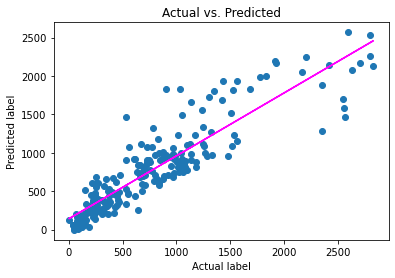

In [300]:
plt.scatter(y_test, prediction)
plt.xlabel("Actual label")
plt.ylabel("Predicted label")
plt.title("Actual vs. Predicted")

#to overlay the regression line

z = np.polyfit(y_test, prediction, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

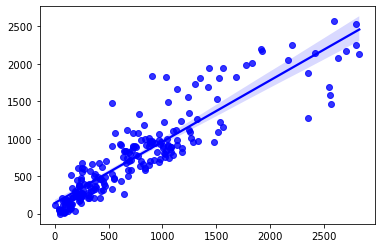

In [301]:
import seaborn as sns
sns.regplot(x = y_test, y = prediction, color = "b");

In [302]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

In [303]:
alg = CatBoostRegressor()

In [304]:
#hyperparameters values

params = {
    "learning_rate" : [0.1, 0.5, 1.0],
    "n_estimators" : [50, 100, 150]
}

In [305]:
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring = score, cv = 3, return_train_score = True)
gridsearch.fit(x_train, y_train)

print("Best parameters combination: ", gridsearch.best_params_)

0:	learn: 675.0476384	total: 3.32ms	remaining: 163ms
1:	learn: 636.3802965	total: 5.74ms	remaining: 138ms
2:	learn: 604.3257374	total: 7.98ms	remaining: 125ms
3:	learn: 575.6902639	total: 10.2ms	remaining: 117ms
4:	learn: 546.1209087	total: 12.4ms	remaining: 112ms
5:	learn: 520.8129888	total: 14.8ms	remaining: 109ms
6:	learn: 496.6065168	total: 18ms	remaining: 110ms
7:	learn: 476.5404025	total: 20.3ms	remaining: 107ms
8:	learn: 457.8288888	total: 21.6ms	remaining: 98.3ms
9:	learn: 441.7707261	total: 23.7ms	remaining: 94.9ms
10:	learn: 426.7027426	total: 26ms	remaining: 92ms
11:	learn: 413.6666166	total: 28.5ms	remaining: 90.1ms
12:	learn: 400.9678182	total: 30.8ms	remaining: 87.6ms
13:	learn: 388.3352571	total: 33.3ms	remaining: 85.7ms
14:	learn: 377.4817084	total: 35.6ms	remaining: 83.1ms
15:	learn: 367.3813534	total: 38.7ms	remaining: 82.3ms
16:	learn: 358.5111606	total: 41.4ms	remaining: 80.3ms
17:	learn: 350.6683424	total: 43.6ms	remaining: 77.6ms
18:	learn: 344.6292616	total: 45.8

68:	learn: 220.2220035	total: 178ms	remaining: 79.8ms
69:	learn: 219.3489555	total: 181ms	remaining: 77.5ms
70:	learn: 218.9960133	total: 184ms	remaining: 75ms
71:	learn: 217.9550597	total: 186ms	remaining: 72.4ms
72:	learn: 217.2966066	total: 189ms	remaining: 69.9ms
73:	learn: 215.8770448	total: 192ms	remaining: 67.4ms
74:	learn: 215.2130205	total: 195ms	remaining: 64.8ms
75:	learn: 213.6855988	total: 197ms	remaining: 62.3ms
76:	learn: 212.7749749	total: 200ms	remaining: 59.8ms
77:	learn: 211.0231587	total: 203ms	remaining: 57.2ms
78:	learn: 210.0588907	total: 206ms	remaining: 54.7ms
79:	learn: 209.5193033	total: 210ms	remaining: 52.4ms
80:	learn: 208.6718812	total: 213ms	remaining: 50ms
81:	learn: 206.8291518	total: 216ms	remaining: 47.4ms
82:	learn: 205.9869639	total: 218ms	remaining: 44.7ms
83:	learn: 204.2292761	total: 220ms	remaining: 41.9ms
84:	learn: 202.5536861	total: 222ms	remaining: 39.2ms
85:	learn: 201.8395001	total: 224ms	remaining: 36.4ms
86:	learn: 200.0448276	total: 22

70:	learn: 228.6665272	total: 171ms	remaining: 69.8ms
71:	learn: 226.8794966	total: 174ms	remaining: 67.6ms
72:	learn: 226.1345383	total: 177ms	remaining: 65.3ms
73:	learn: 225.3061828	total: 179ms	remaining: 63ms
74:	learn: 224.8778157	total: 182ms	remaining: 60.7ms
75:	learn: 224.7066945	total: 183ms	remaining: 57.8ms
76:	learn: 223.4678730	total: 186ms	remaining: 55.5ms
77:	learn: 222.7933995	total: 189ms	remaining: 53.2ms
78:	learn: 220.8073073	total: 191ms	remaining: 50.9ms
79:	learn: 219.6964043	total: 194ms	remaining: 48.6ms
80:	learn: 219.2408314	total: 197ms	remaining: 46.3ms
81:	learn: 218.8402517	total: 201ms	remaining: 44.1ms
82:	learn: 217.1442731	total: 203ms	remaining: 41.7ms
83:	learn: 216.8156539	total: 205ms	remaining: 39.1ms
84:	learn: 216.4785126	total: 207ms	remaining: 36.6ms
85:	learn: 215.1430272	total: 210ms	remaining: 34.1ms
86:	learn: 214.1671226	total: 211ms	remaining: 31.6ms
87:	learn: 212.5183891	total: 213ms	remaining: 29.1ms
88:	learn: 212.1905314	total: 

0:	learn: 638.7378053	total: 3.83ms	remaining: 571ms
1:	learn: 604.2515221	total: 7.54ms	remaining: 558ms
2:	learn: 575.0204650	total: 11.1ms	remaining: 544ms
3:	learn: 550.2526738	total: 14.7ms	remaining: 536ms
4:	learn: 523.9772187	total: 18.3ms	remaining: 530ms
5:	learn: 499.4494597	total: 21.8ms	remaining: 522ms
6:	learn: 478.7081118	total: 25.4ms	remaining: 518ms
7:	learn: 459.2561730	total: 28.8ms	remaining: 512ms
8:	learn: 444.0449205	total: 30.9ms	remaining: 483ms
9:	learn: 429.1154122	total: 34.5ms	remaining: 482ms
10:	learn: 413.5113917	total: 37.1ms	remaining: 468ms
11:	learn: 401.9644235	total: 39.3ms	remaining: 452ms
12:	learn: 391.9185611	total: 41.7ms	remaining: 440ms
13:	learn: 380.9426688	total: 43.9ms	remaining: 426ms
14:	learn: 371.6899257	total: 46ms	remaining: 414ms
15:	learn: 363.1363636	total: 48.1ms	remaining: 403ms
16:	learn: 356.3749717	total: 50.3ms	remaining: 394ms
17:	learn: 349.9967526	total: 52.4ms	remaining: 384ms
18:	learn: 342.5542174	total: 54.5ms	rem

78:	learn: 220.8073073	total: 167ms	remaining: 151ms
79:	learn: 219.6964043	total: 171ms	remaining: 149ms
80:	learn: 219.2408314	total: 173ms	remaining: 148ms
81:	learn: 218.8402517	total: 176ms	remaining: 146ms
82:	learn: 217.1442731	total: 179ms	remaining: 144ms
83:	learn: 216.8156539	total: 181ms	remaining: 143ms
84:	learn: 216.4785126	total: 184ms	remaining: 141ms
85:	learn: 215.1430272	total: 187ms	remaining: 139ms
86:	learn: 214.1671226	total: 190ms	remaining: 138ms
87:	learn: 212.5183891	total: 193ms	remaining: 136ms
88:	learn: 212.1905314	total: 196ms	remaining: 134ms
89:	learn: 211.7980261	total: 198ms	remaining: 132ms
90:	learn: 210.2280048	total: 202ms	remaining: 131ms
91:	learn: 208.5340329	total: 204ms	remaining: 128ms
92:	learn: 206.2872203	total: 206ms	remaining: 126ms
93:	learn: 204.1860954	total: 208ms	remaining: 124ms
94:	learn: 203.3864261	total: 209ms	remaining: 121ms
95:	learn: 201.9814801	total: 211ms	remaining: 119ms
96:	learn: 200.9405077	total: 214ms	remaining:

0:	learn: 536.1710009	total: 4.13ms	remaining: 202ms
1:	learn: 424.6226091	total: 7.99ms	remaining: 192ms
2:	learn: 367.7388801	total: 11.6ms	remaining: 182ms
3:	learn: 330.5586664	total: 15.6ms	remaining: 180ms
4:	learn: 312.7525339	total: 19.3ms	remaining: 173ms
5:	learn: 301.1536812	total: 22.8ms	remaining: 167ms
6:	learn: 284.3271793	total: 26.4ms	remaining: 162ms
7:	learn: 276.5437676	total: 28.6ms	remaining: 150ms
8:	learn: 270.3203842	total: 30.8ms	remaining: 140ms
9:	learn: 262.9312344	total: 33ms	remaining: 132ms
10:	learn: 257.6010723	total: 35.1ms	remaining: 125ms
11:	learn: 251.4355477	total: 37.2ms	remaining: 118ms
12:	learn: 248.1822224	total: 39.4ms	remaining: 112ms
13:	learn: 244.0603181	total: 41.5ms	remaining: 107ms
14:	learn: 240.4600172	total: 43.7ms	remaining: 102ms
15:	learn: 230.2615897	total: 46.8ms	remaining: 99.4ms
16:	learn: 226.0893722	total: 49.8ms	remaining: 96.8ms
17:	learn: 224.1740832	total: 52.8ms	remaining: 93.9ms
18:	learn: 216.7281151	total: 55ms	re

71:	learn: 77.1313970	total: 167ms	remaining: 65ms
72:	learn: 76.6201290	total: 170ms	remaining: 62.9ms
73:	learn: 76.1969817	total: 173ms	remaining: 60.8ms
74:	learn: 74.7464303	total: 176ms	remaining: 58.6ms
75:	learn: 74.1666894	total: 178ms	remaining: 56.4ms
76:	learn: 73.4107425	total: 181ms	remaining: 54.2ms
77:	learn: 72.4910050	total: 184ms	remaining: 51.9ms
78:	learn: 70.9594714	total: 187ms	remaining: 49.7ms
79:	learn: 69.2608581	total: 190ms	remaining: 47.5ms
80:	learn: 68.1787010	total: 193ms	remaining: 45.2ms
81:	learn: 67.6357677	total: 195ms	remaining: 42.9ms
82:	learn: 65.6813755	total: 198ms	remaining: 40.6ms
83:	learn: 64.8828184	total: 203ms	remaining: 38.6ms
84:	learn: 64.1273174	total: 204ms	remaining: 36.1ms
85:	learn: 63.5749532	total: 206ms	remaining: 33.6ms
86:	learn: 62.5961582	total: 208ms	remaining: 31.1ms
87:	learn: 62.4610773	total: 210ms	remaining: 28.6ms
88:	learn: 60.0191303	total: 212ms	remaining: 26.2ms
89:	learn: 59.7721287	total: 213ms	remaining: 23

66:	learn: 70.2511058	total: 178ms	remaining: 220ms
67:	learn: 69.2812153	total: 181ms	remaining: 218ms
68:	learn: 67.8813313	total: 183ms	remaining: 215ms
69:	learn: 66.3739027	total: 186ms	remaining: 213ms
70:	learn: 65.1108260	total: 189ms	remaining: 210ms
71:	learn: 64.5893165	total: 192ms	remaining: 208ms
72:	learn: 62.9305179	total: 194ms	remaining: 205ms
73:	learn: 60.8732608	total: 197ms	remaining: 203ms
74:	learn: 59.8319464	total: 200ms	remaining: 200ms
75:	learn: 58.0268172	total: 203ms	remaining: 198ms
76:	learn: 57.8962262	total: 206ms	remaining: 195ms
77:	learn: 56.7202516	total: 209ms	remaining: 193ms
78:	learn: 55.8872253	total: 212ms	remaining: 191ms
79:	learn: 54.7578038	total: 214ms	remaining: 187ms
80:	learn: 53.1418464	total: 216ms	remaining: 184ms
81:	learn: 53.0408906	total: 218ms	remaining: 181ms
82:	learn: 51.9536805	total: 220ms	remaining: 177ms
83:	learn: 51.4385216	total: 221ms	remaining: 174ms
84:	learn: 49.3339521	total: 223ms	remaining: 171ms
85:	learn: 4

77:	learn: 72.4910050	total: 184ms	remaining: 169ms
78:	learn: 70.9594714	total: 186ms	remaining: 168ms
79:	learn: 69.2608581	total: 189ms	remaining: 166ms
80:	learn: 68.1787010	total: 192ms	remaining: 164ms
81:	learn: 67.6357677	total: 195ms	remaining: 162ms
82:	learn: 65.6813755	total: 198ms	remaining: 160ms
83:	learn: 64.8828184	total: 201ms	remaining: 158ms
84:	learn: 64.1273174	total: 203ms	remaining: 155ms
85:	learn: 63.5749532	total: 206ms	remaining: 153ms
86:	learn: 62.5961582	total: 210ms	remaining: 152ms
87:	learn: 62.4610773	total: 212ms	remaining: 150ms
88:	learn: 60.0191303	total: 214ms	remaining: 147ms
89:	learn: 59.7721287	total: 216ms	remaining: 144ms
90:	learn: 59.1529627	total: 218ms	remaining: 141ms
91:	learn: 57.7918099	total: 220ms	remaining: 139ms
92:	learn: 56.9627852	total: 222ms	remaining: 136ms
93:	learn: 56.3549666	total: 223ms	remaining: 133ms
94:	learn: 54.5165881	total: 225ms	remaining: 130ms
95:	learn: 54.1218181	total: 227ms	remaining: 128ms
96:	learn: 5

0:	learn: 402.1384888	total: 3.86ms	remaining: 189ms
1:	learn: 337.6489222	total: 7.72ms	remaining: 185ms
2:	learn: 316.6290488	total: 11.4ms	remaining: 178ms
3:	learn: 298.3076437	total: 15.2ms	remaining: 175ms
4:	learn: 274.8887851	total: 19.1ms	remaining: 172ms
5:	learn: 265.3101998	total: 22.7ms	remaining: 167ms
6:	learn: 247.5580060	total: 26.4ms	remaining: 162ms
7:	learn: 226.9454554	total: 30.1ms	remaining: 158ms
8:	learn: 218.1102673	total: 34ms	remaining: 155ms
9:	learn: 201.3566413	total: 37.6ms	remaining: 150ms
10:	learn: 194.1153961	total: 41.3ms	remaining: 146ms
11:	learn: 192.3822248	total: 44.4ms	remaining: 140ms
12:	learn: 183.1094309	total: 46.5ms	remaining: 132ms
13:	learn: 163.9219090	total: 48.7ms	remaining: 125ms
14:	learn: 157.0687192	total: 50.9ms	remaining: 119ms
15:	learn: 153.2732634	total: 53.1ms	remaining: 113ms
16:	learn: 148.3498822	total: 55.2ms	remaining: 107ms
17:	learn: 143.9064090	total: 57.4ms	remaining: 102ms
18:	learn: 136.6241708	total: 59.6ms	rem

77:	learn: 14.4609283	total: 171ms	remaining: 48.1ms
78:	learn: 13.7987310	total: 174ms	remaining: 46.2ms
79:	learn: 13.5903690	total: 176ms	remaining: 44.1ms
80:	learn: 13.3968999	total: 179ms	remaining: 42ms
81:	learn: 13.1318641	total: 182ms	remaining: 40ms
82:	learn: 12.5562078	total: 185ms	remaining: 37.8ms
83:	learn: 12.5218132	total: 187ms	remaining: 35.7ms
84:	learn: 12.2561665	total: 190ms	remaining: 33.6ms
85:	learn: 11.9424078	total: 193ms	remaining: 31.4ms
86:	learn: 11.6272869	total: 196ms	remaining: 29.3ms
87:	learn: 11.2907149	total: 199ms	remaining: 27.1ms
88:	learn: 10.7712387	total: 202ms	remaining: 24.9ms
89:	learn: 10.3840839	total: 205ms	remaining: 22.8ms
90:	learn: 10.0476394	total: 207ms	remaining: 20.5ms
91:	learn: 9.8403429	total: 209ms	remaining: 18.2ms
92:	learn: 9.5385894	total: 211ms	remaining: 15.9ms
93:	learn: 9.1990097	total: 213ms	remaining: 13.6ms
94:	learn: 8.9683900	total: 215ms	remaining: 11.3ms
95:	learn: 8.5675843	total: 217ms	remaining: 9.04ms
96

71:	learn: 17.1426932	total: 169ms	remaining: 65.8ms
72:	learn: 16.8552087	total: 172ms	remaining: 63.7ms
73:	learn: 16.6111863	total: 175ms	remaining: 61.5ms
74:	learn: 16.1362272	total: 178ms	remaining: 59.3ms
75:	learn: 15.2111841	total: 181ms	remaining: 57ms
76:	learn: 14.6789620	total: 183ms	remaining: 54.7ms
77:	learn: 14.0941090	total: 186ms	remaining: 52.5ms
78:	learn: 13.7340781	total: 189ms	remaining: 50.3ms
79:	learn: 13.5462574	total: 192ms	remaining: 48ms
80:	learn: 13.2133882	total: 195ms	remaining: 45.7ms
81:	learn: 12.7229873	total: 198ms	remaining: 43.4ms
82:	learn: 12.6852959	total: 201ms	remaining: 41.2ms
83:	learn: 12.4981007	total: 204ms	remaining: 38.8ms
84:	learn: 11.9215155	total: 206ms	remaining: 36.3ms
85:	learn: 11.6370617	total: 207ms	remaining: 33.8ms
86:	learn: 11.2323328	total: 209ms	remaining: 31.3ms
87:	learn: 11.1785736	total: 211ms	remaining: 28.8ms
88:	learn: 10.8803655	total: 213ms	remaining: 26.3ms
89:	learn: 10.5718713	total: 215ms	remaining: 23.9

0:	learn: 398.7100138	total: 5.53ms	remaining: 823ms
1:	learn: 350.4463014	total: 10.8ms	remaining: 801ms
2:	learn: 321.1911040	total: 15.9ms	remaining: 778ms
3:	learn: 307.8139861	total: 21.1ms	remaining: 772ms
4:	learn: 290.4128894	total: 26.3ms	remaining: 763ms
5:	learn: 275.9924324	total: 31.4ms	remaining: 754ms
6:	learn: 254.0797252	total: 36.6ms	remaining: 747ms
7:	learn: 243.3854544	total: 41.9ms	remaining: 744ms
8:	learn: 230.6040510	total: 46.9ms	remaining: 734ms
9:	learn: 217.3455768	total: 50.3ms	remaining: 704ms
10:	learn: 198.2685037	total: 53.5ms	remaining: 676ms
11:	learn: 184.1127858	total: 56.7ms	remaining: 653ms
12:	learn: 173.5880958	total: 60ms	remaining: 632ms
13:	learn: 166.4752074	total: 62.9ms	remaining: 611ms
14:	learn: 156.5443261	total: 66ms	remaining: 594ms
15:	learn: 155.2653949	total: 68.7ms	remaining: 575ms
16:	learn: 152.2166958	total: 71ms	remaining: 555ms
17:	learn: 145.1987560	total: 73.2ms	remaining: 536ms
18:	learn: 135.8671149	total: 75.1ms	remaini

60:	learn: 23.7874680	total: 176ms	remaining: 256ms
61:	learn: 23.0923154	total: 178ms	remaining: 253ms
62:	learn: 22.0944002	total: 180ms	remaining: 249ms
63:	learn: 21.6994979	total: 182ms	remaining: 244ms
64:	learn: 20.7926236	total: 184ms	remaining: 240ms
65:	learn: 20.5754157	total: 185ms	remaining: 236ms
66:	learn: 19.4590419	total: 187ms	remaining: 232ms
67:	learn: 18.7177402	total: 189ms	remaining: 228ms
68:	learn: 18.2802088	total: 191ms	remaining: 224ms
69:	learn: 18.1281374	total: 192ms	remaining: 219ms
70:	learn: 17.9481469	total: 194ms	remaining: 216ms
71:	learn: 17.1426932	total: 196ms	remaining: 212ms
72:	learn: 16.8552087	total: 197ms	remaining: 208ms
73:	learn: 16.6111863	total: 199ms	remaining: 205ms
74:	learn: 16.1362272	total: 202ms	remaining: 202ms
75:	learn: 15.2111841	total: 205ms	remaining: 200ms
76:	learn: 14.6789620	total: 208ms	remaining: 197ms
77:	learn: 14.0941090	total: 211ms	remaining: 195ms
78:	learn: 13.7340781	total: 213ms	remaining: 192ms
79:	learn: 1

Best parameters combination:  {'learning_rate': 0.1, 'n_estimators': 100}


In [306]:
model = gridsearch.best_estimator_

In [307]:
model

In [308]:
prediction = model.predict(x_test)

In [309]:
mse = mean_squared_error(y_test, prediction)

In [310]:
rmse = np.sqrt(mse)

In [311]:
r2 = r2_score(y_test, prediction)

In [312]:
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2_score: ", r2)

MSE:  70767.13832899679
RMSE:  266.02093588474725
R2_score:  0.8247011268839525


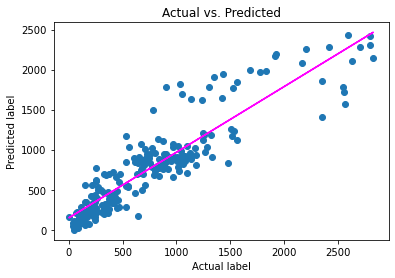

In [313]:
plt.scatter(y_test, prediction)
plt.xlabel("Actual label")
plt.ylabel("Predicted label")
plt.title("Actual vs. Predicted")

#to overlay the regression line

z = np.polyfit(y_test, prediction, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [314]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer  # remember this is to handle missing values though not neede in this dataset
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [315]:
# Define preprocessing for numeric columns (scale them)

numeric_features = [6, 7, 8, 9]
numeric_transformer = Pipeline(steps = [
    ("scaler", StandardScaler())])

In [316]:
# Define preprocessing for categorical features (encode them)

categorical_features = [0, 1, 2, 3, 4, 5]
categorical_transformer = Pipeline(steps = [
    ("onehot", OneHotEncoder(handle_unknown = "ignore"))])

In [317]:
# Combine preprocessing steps

preprocessor = ColumnTransformer(
    transformers = [
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)])

In [318]:
pipeline = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("regressor", CatBoostRegressor())])

In [319]:
# fit the pipeline to train a linear regression model on the training set

model = pipeline.fit(x_train, (y_train))
print(model)

Learning rate set to 0.036822
0:	learn: 688.0229040	total: 8.01ms	remaining: 8s
1:	learn: 672.4006295	total: 17.7ms	remaining: 8.86s
2:	learn: 658.8689929	total: 27ms	remaining: 8.97s
3:	learn: 644.6246128	total: 36.4ms	remaining: 9.07s
4:	learn: 630.7420160	total: 45.5ms	remaining: 9.06s
5:	learn: 617.6351498	total: 54.7ms	remaining: 9.06s
6:	learn: 605.6255952	total: 63.9ms	remaining: 9.06s
7:	learn: 592.7607779	total: 73.4ms	remaining: 9.1s
8:	learn: 581.9737791	total: 83ms	remaining: 9.13s
9:	learn: 570.6629129	total: 91.6ms	remaining: 9.07s
10:	learn: 560.3282939	total: 100ms	remaining: 9.03s
11:	learn: 549.5081446	total: 109ms	remaining: 9s
12:	learn: 539.5321455	total: 118ms	remaining: 8.98s
13:	learn: 530.0461123	total: 128ms	remaining: 9.03s
14:	learn: 520.6969832	total: 137ms	remaining: 9.03s
15:	learn: 511.7716918	total: 147ms	remaining: 9.01s
16:	learn: 502.7495216	total: 155ms	remaining: 8.98s
17:	learn: 495.5661978	total: 160ms	remaining: 8.72s
18:	learn: 487.4370956	tota

206:	learn: 228.9085049	total: 806ms	remaining: 3.09s
207:	learn: 228.6596757	total: 809ms	remaining: 3.08s
208:	learn: 228.2972258	total: 812ms	remaining: 3.07s
209:	learn: 227.9722527	total: 815ms	remaining: 3.07s
210:	learn: 227.5498765	total: 818ms	remaining: 3.06s
211:	learn: 227.2741932	total: 821ms	remaining: 3.05s
212:	learn: 227.0881014	total: 824ms	remaining: 3.04s
213:	learn: 226.6817506	total: 827ms	remaining: 3.04s
214:	learn: 226.3615707	total: 830ms	remaining: 3.03s
215:	learn: 225.7819832	total: 833ms	remaining: 3.02s
216:	learn: 225.4084268	total: 837ms	remaining: 3.02s
217:	learn: 225.1457352	total: 841ms	remaining: 3.02s
218:	learn: 224.8530391	total: 844ms	remaining: 3.01s
219:	learn: 224.6140569	total: 847ms	remaining: 3s
220:	learn: 224.1549427	total: 850ms	remaining: 3s
221:	learn: 223.5527703	total: 853ms	remaining: 2.99s
222:	learn: 223.3955541	total: 855ms	remaining: 2.98s
223:	learn: 222.6142978	total: 858ms	remaining: 2.97s
224:	learn: 222.2295424	total: 860

396:	learn: 167.9878785	total: 1.32s	remaining: 2s
397:	learn: 167.8545816	total: 1.32s	remaining: 2s
398:	learn: 167.5618947	total: 1.32s	remaining: 1.99s
399:	learn: 167.3016332	total: 1.32s	remaining: 1.99s
400:	learn: 167.1808661	total: 1.33s	remaining: 1.98s
401:	learn: 167.0286216	total: 1.33s	remaining: 1.98s
402:	learn: 166.6137076	total: 1.33s	remaining: 1.98s
403:	learn: 166.4261829	total: 1.34s	remaining: 1.97s
404:	learn: 166.1446424	total: 1.34s	remaining: 1.97s
405:	learn: 165.8543453	total: 1.34s	remaining: 1.96s
406:	learn: 165.6482279	total: 1.35s	remaining: 1.96s
407:	learn: 165.5148866	total: 1.35s	remaining: 1.96s
408:	learn: 165.1808419	total: 1.35s	remaining: 1.95s
409:	learn: 164.9784493	total: 1.35s	remaining: 1.95s
410:	learn: 164.7269408	total: 1.36s	remaining: 1.95s
411:	learn: 164.5018185	total: 1.36s	remaining: 1.94s
412:	learn: 164.2916666	total: 1.36s	remaining: 1.94s
413:	learn: 164.0720262	total: 1.36s	remaining: 1.93s
414:	learn: 163.7866438	total: 1.3

583:	learn: 133.4892900	total: 1.83s	remaining: 1.3s
584:	learn: 133.2696123	total: 1.83s	remaining: 1.3s
585:	learn: 133.1515242	total: 1.83s	remaining: 1.29s
586:	learn: 133.0470788	total: 1.83s	remaining: 1.29s
587:	learn: 132.8009436	total: 1.84s	remaining: 1.29s
588:	learn: 132.7108586	total: 1.84s	remaining: 1.28s
589:	learn: 132.6477787	total: 1.84s	remaining: 1.28s
590:	learn: 132.5466267	total: 1.85s	remaining: 1.28s
591:	learn: 132.2409781	total: 1.85s	remaining: 1.27s
592:	learn: 132.0819544	total: 1.85s	remaining: 1.27s
593:	learn: 131.7863853	total: 1.86s	remaining: 1.27s
594:	learn: 131.7156800	total: 1.86s	remaining: 1.27s
595:	learn: 131.5534644	total: 1.86s	remaining: 1.26s
596:	learn: 131.4233247	total: 1.87s	remaining: 1.26s
597:	learn: 131.3158112	total: 1.87s	remaining: 1.26s
598:	learn: 131.1553087	total: 1.87s	remaining: 1.25s
599:	learn: 131.0422891	total: 1.87s	remaining: 1.25s
600:	learn: 130.9248096	total: 1.88s	remaining: 1.25s
601:	learn: 130.7957618	total:

774:	learn: 109.7664614	total: 2.34s	remaining: 679ms
775:	learn: 109.7521628	total: 2.34s	remaining: 676ms
776:	learn: 109.7330813	total: 2.35s	remaining: 673ms
777:	learn: 109.6266303	total: 2.35s	remaining: 670ms
778:	learn: 109.5456297	total: 2.35s	remaining: 667ms
779:	learn: 109.4193539	total: 2.36s	remaining: 665ms
780:	learn: 109.3021783	total: 2.36s	remaining: 662ms
781:	learn: 109.1899473	total: 2.36s	remaining: 659ms
782:	learn: 109.0616539	total: 2.37s	remaining: 656ms
783:	learn: 108.8770769	total: 2.37s	remaining: 653ms
784:	learn: 108.7599542	total: 2.37s	remaining: 650ms
785:	learn: 108.5772037	total: 2.38s	remaining: 647ms
786:	learn: 108.5270952	total: 2.38s	remaining: 644ms
787:	learn: 108.3794530	total: 2.38s	remaining: 641ms
788:	learn: 108.3139893	total: 2.38s	remaining: 638ms
789:	learn: 108.1744769	total: 2.39s	remaining: 635ms
790:	learn: 108.0422930	total: 2.39s	remaining: 631ms
791:	learn: 107.9316945	total: 2.39s	remaining: 628ms
792:	learn: 107.8568168	tota

960:	learn: 93.0115754	total: 2.85s	remaining: 116ms
961:	learn: 92.9197651	total: 2.86s	remaining: 113ms
962:	learn: 92.8524220	total: 2.86s	remaining: 110ms
963:	learn: 92.7859557	total: 2.87s	remaining: 107ms
964:	learn: 92.6899248	total: 2.87s	remaining: 104ms
965:	learn: 92.6392283	total: 2.87s	remaining: 101ms
966:	learn: 92.5185258	total: 2.88s	remaining: 98.2ms
967:	learn: 92.5129829	total: 2.88s	remaining: 95.3ms
968:	learn: 92.4444499	total: 2.89s	remaining: 92.4ms
969:	learn: 92.3498810	total: 2.89s	remaining: 89.4ms
970:	learn: 92.3286524	total: 2.89s	remaining: 86.4ms
971:	learn: 92.2735842	total: 2.9s	remaining: 83.5ms
972:	learn: 92.2589463	total: 2.9s	remaining: 80.5ms
973:	learn: 92.1625088	total: 2.9s	remaining: 77.5ms
974:	learn: 92.0309384	total: 2.91s	remaining: 74.5ms
975:	learn: 91.9825087	total: 2.91s	remaining: 71.5ms
976:	learn: 91.9784171	total: 2.91s	remaining: 68.6ms
977:	learn: 91.8955980	total: 2.92s	remaining: 65.6ms
978:	learn: 91.7878561	total: 2.92s	r

In [320]:
prediction = model.predict(x_test)

In [321]:
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, prediction)

In [322]:
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2 SCORE:", r2)

MSE:  69341.57172187167
RMSE:  263.3278787403105
R2 SCORE: 0.8282324300520856


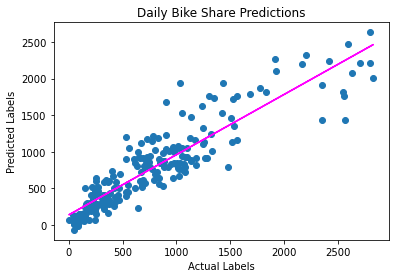

In [323]:
# Plot predicted vs actual
plt.scatter(y_test, prediction)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
z = np.polyfit(y_test, prediction, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

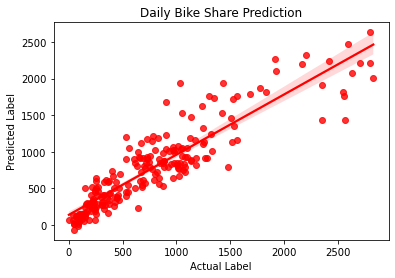

In [324]:
sns.regplot(x = y_test, y = prediction, color = "r")
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.title("Daily Bike Share Prediction");

In [336]:
#to save the file

import joblib

filename = "./bike_predict_model.pkl"
joblib.dump(model, filename)

['./bike_predict_model.pkl']

In [337]:
# Load the model from the file

loaded_model = joblib.load(filename)

In [338]:
# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([[1,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869]]).astype('float64')

print("New Sample: {}".format(list(X_new[0])))

New Sample: [1.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, 0.22927, 0.436957, 0.1869]


In [339]:
# Use the model to predict tomorrow's rentals

result = loaded_model.predict(X_new)

In [340]:
result

array([86.16644084])

In [341]:
#np.round(result, 0)
print("Prediction: {:.0f} rentals".format(np.round(result[0])))

# the {:.0f} means to zero significance figure, i.e 0 figure

Prediction: 86 rentals


The model's predict method accepts an array of observations, so you can use it to generate multiple predictions as a batch. For example, suppose you have a weather forecast for the next five days; you could use the model to predict bike rentals for each day based on the expected weather conditions.

In [342]:
# An array of features based on five-day weather forecast
X_new = np.array([[0,1,1,0,0,1,0.344167,0.363625,0.805833,0.160446],
                  [0,1,0,1,0,1,0.363478,0.353739,0.696087,0.248539],
                  [0,1,0,2,0,1,0.196364,0.189405,0.437273,0.248309],
                  [0,1,0,3,0,1,0.2,0.212122,0.590435,0.160296],
                  [0,1,0,4,0,1,0.226957,0.22927,0.436957,0.1869]])

In [343]:
# Use the model to predict rentals

result = loaded_model.predict(X_new)

In [344]:
result

array([539.49623977, 740.14155277, 443.46762333, 508.14820096,
       442.77033068])

In [345]:
for i in result:
    print (i)

539.496239766454
740.1415527724079
443.46762332970724
508.14820095629676
442.7703306828388


In [346]:
print("5 days Predictions: ")
for i in result:
    print(i)

5 days Predictions: 
539.496239766454
740.1415527724079
443.46762332970724
508.14820095629676
442.7703306828388
